# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Tablica pomyłek


In [1]:
import matplotlib.pyplot as plt
import numpy as  np 
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
breast = load_breast_cancer()

from sklearn.linear_model import LogisticRegression

X, y = breast.data, breast.target
X_train_breast, X_test_breast, y_train_breast, y_test_breast = \
    train_test_split(X, y, test_size=0.23)

In [2]:
clf = LogisticRegression() #min_samples_split=10)
clf = clf.fit(X_train_breast, y_train_breast)

 Załóżmy że wykrywamy łagodną postać:
 
 - `0` - malignant złośliwy - Negative
 - `1` - benign łagodny - Positive

In [3]:
print(breast.target_names, breast.data.shape,np.unique(breast.target))

['malignant' 'benign'] (569, 30) [0 1]


In [4]:
print(breast.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
from sklearn.metrics import f1_score, accuracy_score, \
   confusion_matrix, classification_report, roc_curve,\
    recall_score, precision_score

predicted = clf.predict(X_test_breast)
actual = y_test_breast

### Macierz pomyłek  - confusion matrix

In [39]:
N = X_test_breast.shape[0]
np.sum( predicted == actual )/N
TP = np.sum( (predicted == actual) & (predicted==1) )
TN = np.sum( (predicted == actual) & (predicted==0) )
FP = np.sum( (predicted != actual) & (predicted==1) )
FN = np.sum( (predicted != actual) & (predicted==0) )

In [40]:
np.array([[TP,FP],[FN,TN]])

array([[79,  1],
       [ 3, 48]])

In [41]:
## Uwaga!
confusion_matrix(actual,predicted)[::-1,::-1].T

array([[79,  1],
       [ 3, 48]])

In [33]:
np.testing.assert_array_equal(np.array([[TP,FP],[FN,TN]]),\
                            confusion_matrix(actual,predicted)[::-1,::-1].T)

In [45]:
Recall = TP/(TP+FN)
Recall, recall_score(actual,predicted)

(0.9634146341463414, 0.9634146341463414)

In [46]:
np.testing.assert_allclose( Recall, recall_score(actual,predicted), rtol=1e-3)

In [49]:
Precision = TP/(TP+FP)

In [50]:
np.testing.assert_allclose( Precision, precision_score(actual,predicted), rtol=1e-3)

In [51]:
Accuracy =  (TP+TN)/N

accuracy_score(actual,predicted)

0.9694656488549618

In [52]:
np.testing.assert_allclose( Accuracy, accuracy_score(actual,predicted), rtol=1e-3)

## Receiver operating characteristic (ROC)


Text(0.5,0,'TPR')

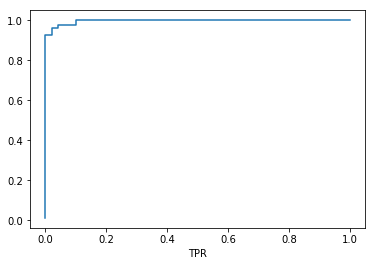

In [53]:
fpr,tpr,t = roc_curve(actual, 
                      clf.decision_function(X_test_breast) )

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.xlabel('TPR')

In [54]:
print(classification_report(actual,predicted))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96        49
          1       0.99      0.96      0.98        82

avg / total       0.97      0.97      0.97       131



In [55]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train[:,:], y_train[:])
y_score = classifier.decision_function(X_test)

Text(0.5,0,'TPR')

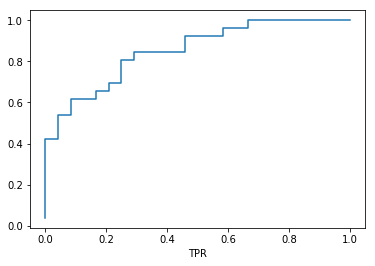

In [56]:
fpr,tpr,t = roc_curve(y_test, 
                      classifier.decision_function(X_test) )

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.xlabel('TPR')

In [57]:
y_true = np.array([0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0, 1, 0, 1, 0, 1, 0, 1])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

In [58]:
predicted = y_pred
actual = y_true

TP = np.sum( (predicted == actual) & (predicted==1) )
TN = np.sum( (predicted == actual) & (predicted==0) )
FP = np.sum( (predicted != actual) & (predicted==1) )
FN = np.sum( (predicted != actual) & (predicted==0) )


In [59]:
TN,FP,FN,TP

(2, 1, 2, 3)